# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv('/Users/nada/Downloads/Mall_Customers.csv')
print(f'Shape of the data: {df.shape}')
df.head()

Shape of the data: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.rename(columns = {'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace = True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [4]:
print('This dataset contains ',df.shape[0],'rows')
print('This dataset contains ',df.shape[1],'columns')

This dataset contains  200 rows
This dataset contains  5 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Duplicates check
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [8]:
df.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

In [9]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:ylabel='Gender'>

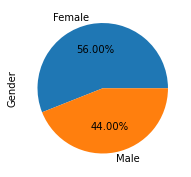

In [10]:
plt.figure(figsize=(3,3))
pd.Series(df['Gender']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

In [11]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

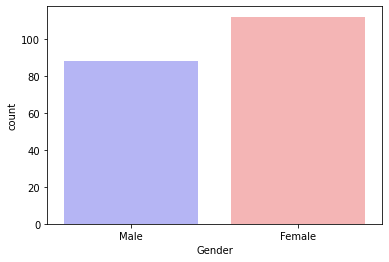

In [12]:
sns.countplot(x="Gender", data=df, palette="bwr")
plt.show()

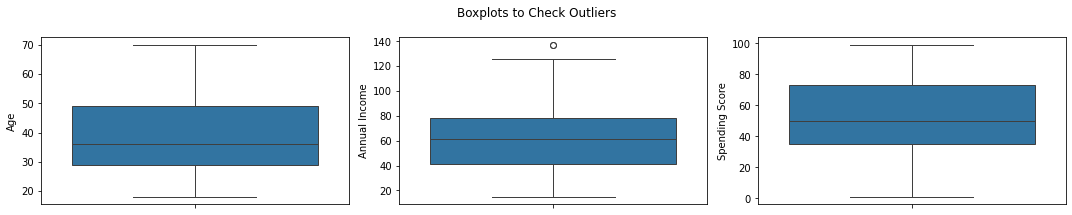

In [13]:
#Check for outlier 
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Annual Income', 'Spending Score']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()

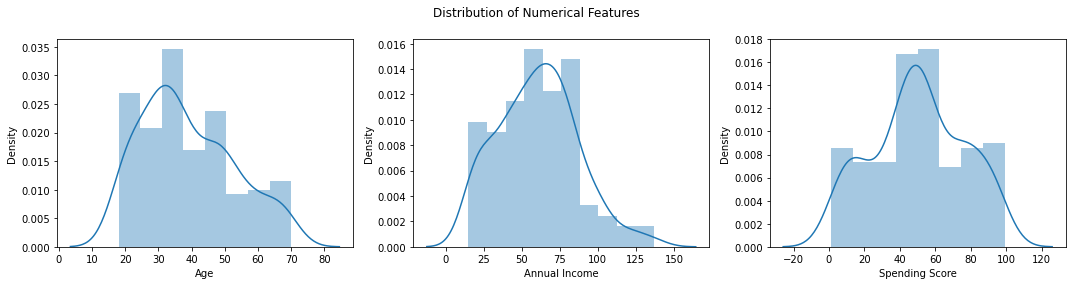

In [14]:
# Distribution of numerical features
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Annual Income', 'Spending Score']
for i in range(len(cols)):
    sns.distplot(df[cols[i]], ax=axs[i])
fig.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

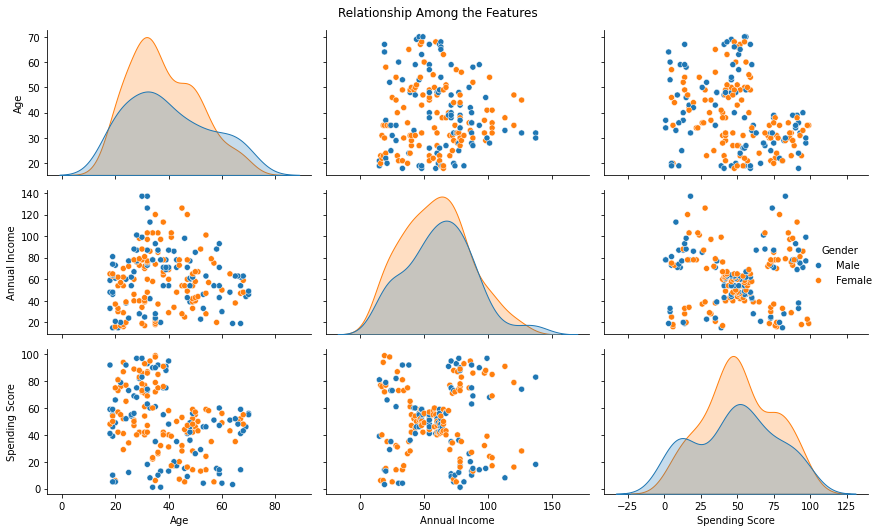

In [15]:
# Relationship among the features
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.suptitle('Relationship Among the Features')
plt.tight_layout()
plt.show()

## Scaling Data

The K-means algorithm definitely needs scaling. However, if all our features are in the same/similar range, there is no need to scale the data

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [16]:
df2 = df[['Age', 'Spending Score']].copy()

In [17]:
df2.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


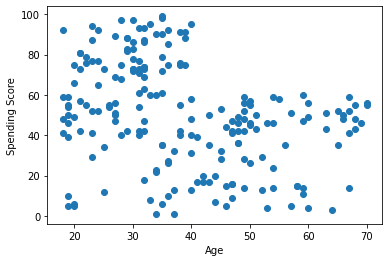

In [18]:
plt.scatter(df2['Age'], df2['Spending Score'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

#### *ii. Determine optimal number of clusters*

# Elbow method

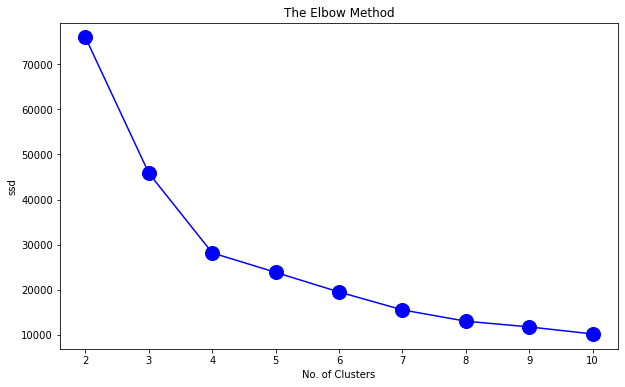

In [22]:
ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df2)
    ssd.append(kmeans.inertia_)  # distances from each observation to each cluster centroid

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-",  markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

Considering the above elbow curve, 4 number of clusters will be an optimum choice.

In [23]:
ssd # sum of squared distance

[75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23838.248821646186,
 19483.1179104427,
 15514.193134351031,
 13006.48362885102,
 11738.020296954506,
 10173.039478114479]

In [24]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4327.334745
4     4355.130911
5     3968.924776
6     2507.709506
7     1268.463332
8     1564.980819
dtype: float64

Text(0.5, 1.0, 'elbow method')

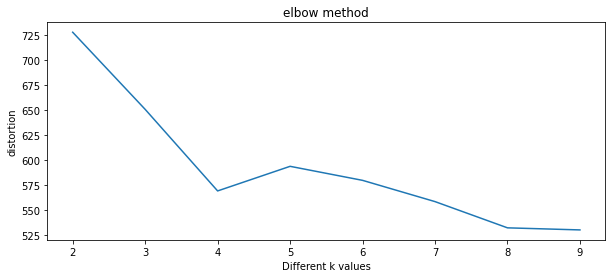

In [25]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df2)
    distances = kmeanModel.transform(df2)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] 
        result.append(np.mean(cluster_distances ** 2)) 
    distortion.append(sum(result))
    
    
plt.figure(figsize=(10, 4))
plt.plot(K, distortion)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### silhouette_score 

In [26]:
# calculate the score for each cluster
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116


Clustering with 4 clusters (n_clusters=4) has the highest silhouette score of 0.49973941540141753, indicating relatively good clustering quality

In [27]:
K_means_model_ageSpending = KMeans(n_clusters=4, random_state=42)
K_means_model_ageSpending.fit(df2)

KMeans(n_clusters=4, random_state=42)

In [28]:
# calculate the score for all clusters
silhouette_score(df2, K_means_model_ageSpending.labels_)

0.49973941540141753

#### *iii. Apply K Means*

In [29]:
K_means_model_ageSpending = KMeans(n_clusters=4, random_state=42)
K_means_model_ageSpending.fit_predict(df2)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [30]:
# Obtain the cluster labels
K_means_model_ageSpending.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [31]:
clusters = K_means_model_ageSpending.labels_

In [32]:
df2.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [33]:
df2["predicted_clusters"] = clusters

In [34]:
df2

,Age,Spending Score,predicted_clusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


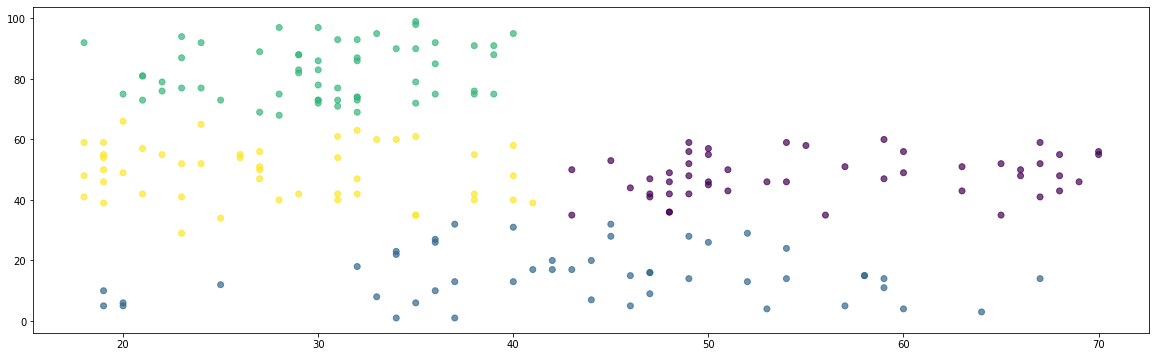

In [35]:
plt.figure(figsize = (20,6))
plt.scatter(df2["Age"],
            df2["Spending Score"],
            c=clusters,  # c : coloring parameter
            cmap="viridis",
            alpha=0.7)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [36]:
df3 = df[['Annual Income', 'Spending Score']].copy()

In [37]:
df3.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


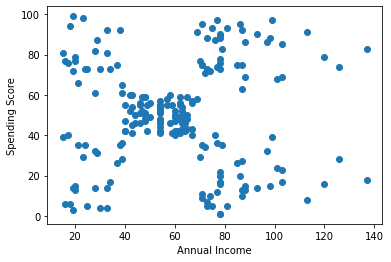

In [38]:
plt.scatter(df3['Annual Income'], df3['Spending Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### *ii. Determine optimal number of clusters*

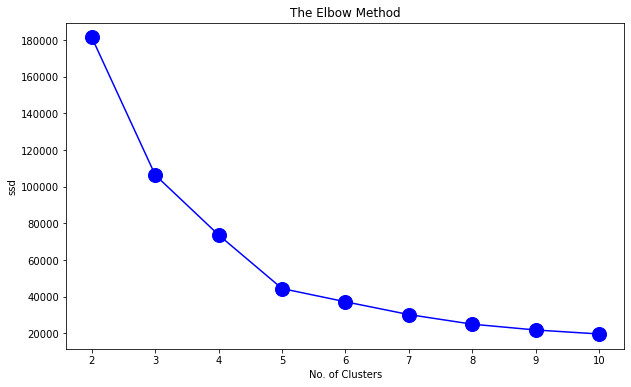

In [40]:
ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df3)
    ssd.append(kmeans.inertia_)  # distances from each observation to each cluster centroid

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-",  markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [41]:
ssd # sum of squared distance

[181363.59595959593,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.814510710006,
 30259.65720728547,
 25011.839349156595,
 21850.16528258563,
 19672.072849014323]

In [42]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6974.157303
6     5247.817858
7     3161.674067
8     2178.092434
dtype: float64

Text(0.5, 1.0, 'elbow method')

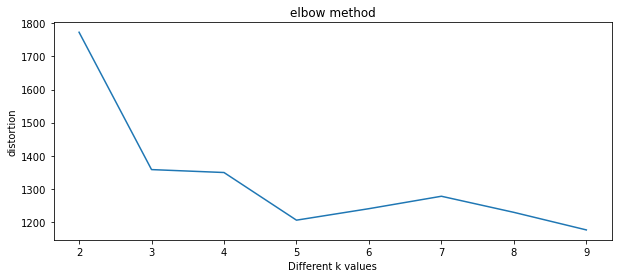

In [43]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df3)
    distances = kmeanModel.transform(df3)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] 
        result.append(np.mean(cluster_distances ** 2)) 
    distortion.append(sum(result))
    
    
plt.figure(figsize=(10, 4))
plt.plot(K, distortion)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

# silhouette_score

In [44]:
# calculate the score for each cluster
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(df3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4565077334305076


#### *iii. Apply K Means*

In [45]:
K_means_model2 = KMeans(n_clusters=5, random_state=42)

In [46]:
K_means_model2.fit_predict(df3)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [47]:
# Obtain the cluster labels
K_means_model2.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [48]:
clusters = K_means_model2.labels_

In [49]:
df3.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [50]:
df3["predicted_clusters"] = clusters

In [51]:
df3.head(20)

,Annual Income,Spending Score,predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
5,17,76,3
6,18,6,2
7,18,94,3
8,19,3,2
9,19,72,3


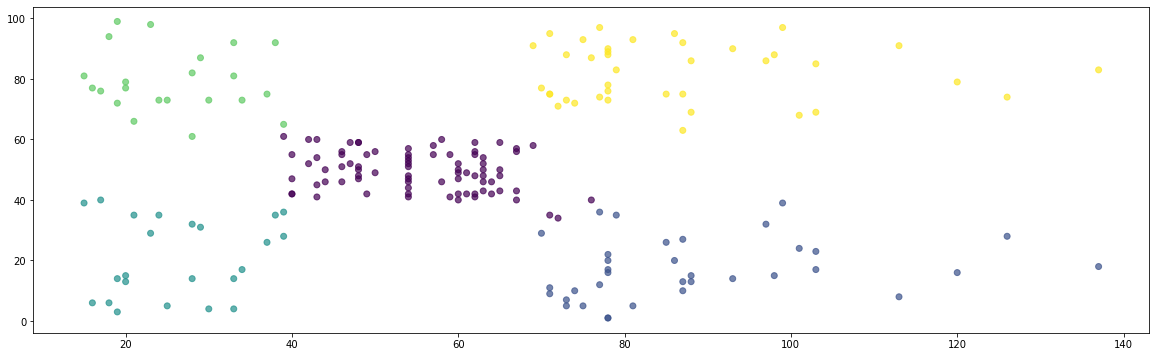

In [52]:
plt.figure(figsize = (20,6))
plt.scatter(df3["Annual Income"],
            df3["Spending Score"],
            c=clusters,  # c : coloring parameter
            cmap="viridis",
            alpha=0.7)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [53]:
# Select the relevant columns for clustering
df4 = df[['Age', 'Spending Score']].copy()

In [54]:
df4.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


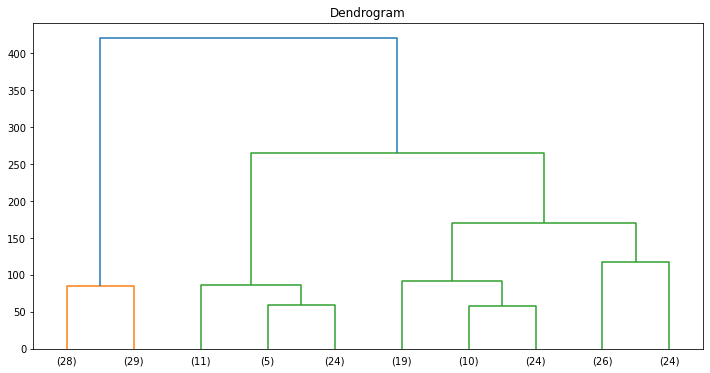

In [55]:
# Plotting dendrogram to identify optimum no. of clusters
mergings = linkage(df4, method="ward")
plt.figure(figsize=(12, 6))
plt.title('Dendrogram')
dendrogram(mergings, leaf_font_size=10, truncate_mode='lastp', p=10);
plt.show()

In [56]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(df4)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df4, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091
Silhouette Score for 10 clusters: 0.3876666104778445


## Clustering based on Annual Income and Spending Score- x2

In [57]:
df5 = df[['Annual Income', 'Spending Score']].copy()

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [58]:
aggclust = AgglomerativeClustering(n_clusters=4,
                                      affinity="euclidean",
                                      linkage="ward")
clusters = aggclust.fit_predict(df4)
df4["clusters"] = clusters
df4.head()

,Age,Spending Score,clusters
0,19,39,0
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,0


### iii. *Visualizing and Labeling All the Clusters* 

In [59]:
aggclust.labels_

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

In [60]:
df4.clusters.value_counts()

3    57
1    53
0    50
2    40
Name: clusters, dtype: int64

<AxesSubplot:xlabel='clusters', ylabel='Spending Score'>

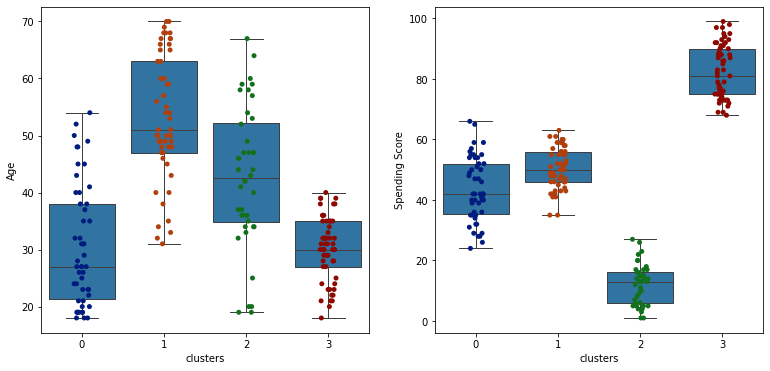

In [61]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="clusters", data=df4)
sns.stripplot(y="Age", x="clusters", data=df4, palette="dark")

plt.subplot(132)
sns.boxplot(y="Spending Score", x="clusters", data=df4)
sns.stripplot(y="Spending Score", x="clusters", data=df4, palette="dark")

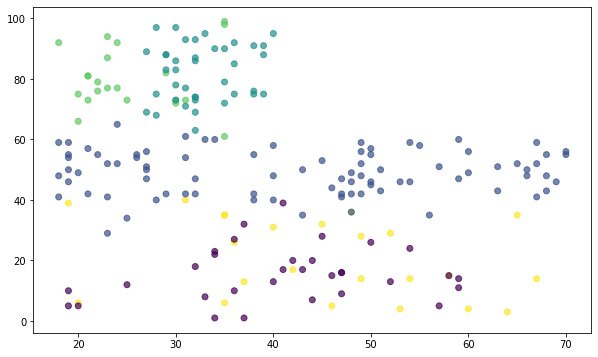

In [71]:
plt.scatter(df["Age"],
            df["Spending Score"],
            c=clusters,
            cmap="viridis",
            alpha=0.7)

#### Annual Income and Spending Score- x2

In [63]:
aggclust = AgglomerativeClustering(n_clusters=5,
                                      affinity="euclidean",
                                      linkage="ward")
clusters = aggclust.fit_predict(df5)
df5["clusters"] = clusters
df5.head()

,Annual Income,Spending Score,clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### iii. *Visualizing and Labeling All the Clusters* 

In [64]:
aggclust.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [65]:
df5.clusters.value_counts()

1    85
2    39
0    32
4    23
3    21
Name: clusters, dtype: int64

<AxesSubplot:xlabel='clusters', ylabel='Spending Score'>

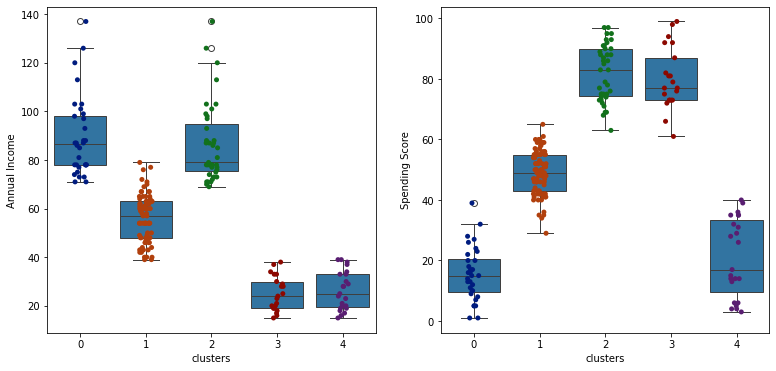

In [66]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Annual Income", x="clusters", data=df5)
sns.stripplot(y="Annual Income", x="clusters", data=df5, palette="dark")

plt.subplot(132)
sns.boxplot(y="Spending Score", x="clusters", data=df5)
sns.stripplot(y="Spending Score", x="clusters", data=df5, palette="dark")

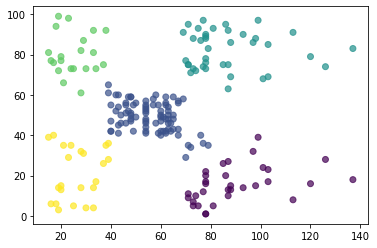

In [67]:
plt.scatter(df["Annual Income"],
            df["Spending Score"],
            c=clusters,
            cmap="viridis",
            alpha=0.7)

### Conclusion

#### Interpretation based on Age and Spending Score- x1

***Applying K-means clustering to identify distinct customer segments based on their age and spending behavior.***

**- Younger Moderate Spenders**: This cluster consists of younger customers with a moderate spending score. 
They may be in the early stages of their careers or have limited income.

**- Younger High Spenders**: This cluster represents younger customers with a higher spending score. They have a higher level of disposable income and are willing to spend on various products and experiences. 

**- Older Moderate Spenders**: This cluster consists of older customers with a moderate spending score. They may be middle-aged or approaching retirement. They tend to be more conservative in their spending habits, focusing on practical and necessary purchases rather than indulgences.

**- Diverse Low Spenders**: This cluster represents a diverse group of customers encompassing various age segments, and they exhibit relatively lower spending scores. The wide range of ages suggests that this cluster comprises customers from different life stages and demographics. However, despite their age differences, they share a common characteristic of having lower spending scores.

#### Interpretation based on Annual Income and Spending Score- x2

***Applying K-means clustering to identify distinct groups of customers based on their income and spending behavior.***

**- High-income, high-spending customers**: cluster represent both high annual incomes and high spending scores,
it suggests that these customers have a higher purchasing power and are willing to spend more on products or services.
    
**- Low-income, low-spending customers**: cluster represent both low annual incomes and low spending scores, 
it indicates that these customers have limited disposable income and tend to be more conservative in their spending habits. 

**- High-income, low-spending customers**: cluster represent high annual incomes but low spending scores,
it suggests that these customers have the financial means to spend more but choose to be more frugal or have specific savings goals.

**- Low-income, high-spending customers**: cluster represent low annual incomes but high spending scores, 
it indicates that these customers have a higher propensity to spend, even with limited financial resources.

**- Moderate income,moderate spending customers**: cluster represent both moderate income and spending score,
it indicates that these customers have a moderate level of income and tend to spend within a moderate range. 
They may prioritize value for money,or have specific budget considerations that influence their spending decisions.

## Conclusion

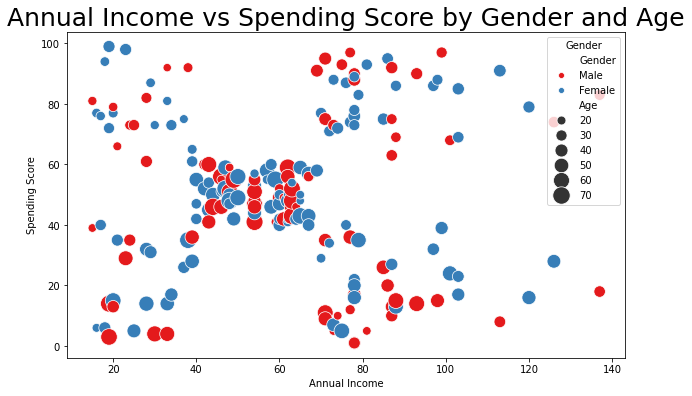

In [76]:
plt.rcParams['figure.figsize'] = (10, 6)

# Scatter plot with different colors for gender and marker sizes for age
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Gender', size='Age', sizes=(70, 300), data=df, palette='Set1')

plt.title('Annual Income vs Spending Score by Gender and Age', fontsize=25)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Gender')
plt.show()

***Customer Segmentation using K-means Clustering based on Annual Income and Spending Score*** 

Is a scatter plot that demonstrates the application of K-means clustering algorithm to segment customers based on their annual income and spending score as key factors.



This visualization enables businesses to discern distinct groups of customers based on their income and spending behavior, while also considering gender and age. It facilitates the identification of customer segments with similar purchasing habits and characteristics, enabling targeted marketing strategies, personalized product offerings, and tailored customer experiences.